# Unemployment Rate in Australia from 2018 to 2020

In [1]:
#%matplotlib notebook

In [2]:
# Dependencies
import requests
from pprint import pprint
from config import vic_key
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from scipy import stats
import scipy.stats as st
import datetime
url = "https://api.vic.gov.au:443/abs/v1.0/labour-force-statistics?"


In [74]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [3]:
#fliter
params = {
'region': "AUSTRALIA",
'data_item': "UNEMPLOYMENT_RATE",
'age': "15_AND_OVER",
'start_period': "2018-01",
'end_period': "2020-12"
}

In [4]:
headers = {
  "Content-Type": "application/json",
  "Accept": "application/json",
  "apikey": vic_key
}

In [5]:
# Request data
response = requests.get(url, headers = headers, params = params)
# Converting the response to JSON, and printing the result.
data = response.json()
pprint(data)

{'_links': [{'href': '/abs/v1.0/labour-force-statistics?age=15_AND_OVER&data_item=UNEMPLOYMENT_RATE&end_period=2020-12&region=AUSTRALIA&start_period=2018-01&page=1&limit=1000',
             'rel': 'self'},
            {'href': '/abs/v1.0/labour-force-statistics?age=15_AND_OVER&data_item=UNEMPLOYMENT_RATE&end_period=2020-12&region=AUSTRALIA&start_period=2018-01&page=1&limit=1000',
             'rel': 'first'},
            {'href': '/abs/v1.0/labour-force-statistics?age=15_AND_OVER&data_item=UNEMPLOYMENT_RATE&end_period=2020-12&region=AUSTRALIA&start_period=2018-01&page=1&limit=1000',
             'rel': 'last'}],
 '_meta': {'count': 324,
           'limit': 1000,
           'page': 1,
           'response_time': '1.55 seconds',
           'response_time_ms': 1550,
           'total_records': 324},
 'labour_force_statistics': [{'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 

                             {'adjustment_type_description': 'Trend',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2018-11',
                              'observation_value': 'NaN',
                              'region_description': 'Australia',
                              'sex_description': 'Females'},
                             {'adjustment_type_description': 'Trend',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2018-12',
                              'observation_value': 'NaN',
                              'region_description': 'Australia',
                              'sex_description': 'Females'},
                             {'adjustment_type_description': 'Trend',
          

In [6]:
data1 = data['labour_force_statistics']

In [7]:
unemployment_aus_df = pd.DataFrame(data1)
clean_unemployment_aus_df = unemployment_aus_df[unemployment_aus_df.observation_value != 'NaN']
clean_unemployment_aus_df["observation_value"] = clean_unemployment_aus_df.observation_value.astype(float)
clean_unemployment_aus_df


<ipython-input-7-c208b77c098c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_unemployment_aus_df["observation_value"] = clean_unemployment_aus_df.observation_value.astype(float)


,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
0,Australia,Unemployment rate (%),Males,15 and over,Original,2018-01,5.891457
1,Australia,Unemployment rate (%),Males,15 and over,Original,2018-02,5.868295
2,Australia,Unemployment rate (%),Males,15 and over,Original,2018-03,5.728069
3,Australia,Unemployment rate (%),Males,15 and over,Original,2018-04,5.503253
4,Australia,Unemployment rate (%),Males,15 and over,Original,2018-05,5.203687
...,...,...,...,...,...,...,...
283,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-08,6.804698
284,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-09,6.909572
285,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-10,6.980306
286,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-11,6.817515


In [8]:
clean_unemployment_aus_df.dtypes

region_description              object
data_item_description           object
sex_description                 object
age_description                 object
adjustment_type_description     object
observation_month               object
observation_value              float64
dtype: object

In [9]:
# Extract individual Without genders
generaldf = clean_unemployment_aus_df.loc[clean_unemployment_aus_df["sex_description"] == "Persons"]
generaldf

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
216,Australia,Unemployment rate (%),Persons,15 and over,Original,2018-01,5.961396
217,Australia,Unemployment rate (%),Persons,15 and over,Original,2018-02,6.042301
218,Australia,Unemployment rate (%),Persons,15 and over,Original,2018-03,5.860192
219,Australia,Unemployment rate (%),Persons,15 and over,Original,2018-04,5.582364
220,Australia,Unemployment rate (%),Persons,15 and over,Original,2018-05,5.289476
...,...,...,...,...,...,...,...
283,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-08,6.804698
284,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-09,6.909572
285,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-10,6.980306
286,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-11,6.817515


In [55]:
# Extract individual Without genders
general1=generaldf.loc[generaldf["adjustment_type_description"] == "Seasonally Adjusted"]
general1.head()

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
252,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2018-01,5.501085
253,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2018-02,5.559338
254,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2018-03,5.505104
255,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2018-04,5.534267
256,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2018-05,5.406442


In [56]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Only keep: "isbn", "original_publication_year", "original_title", "authors",
# "ratings_1", "ratings_2", "ratings_3", "ratings_4", "ratings_5"
reduced_df = general1[["observation_month", "observation_value",]]
reduced_df.head()

,observation_month,observation_value
252,2018-01,5.501085
253,2018-02,5.559338
254,2018-03,5.505104
255,2018-04,5.534267
256,2018-05,5.406442


In [57]:
# Rename the headers to be more explanatory
renamed_df = reduced_df.rename(columns={"observation_month": "Quarter", "observation_value": "rate (%)"})
renamed_df.dtypes

Quarter      object
rate (%)    float64
dtype: object

In [58]:
renamed_df['Quarter']= pd.to_datetime(renamed_df['Quarter'])
renamed_df

,Quarter,rate (%)
252,2018-01-01,5.501085
253,2018-02-01,5.559338
254,2018-03-01,5.505104
255,2018-04-01,5.534267
256,2018-05-01,5.406442
257,2018-06-01,5.318580
258,2018-07-01,5.275815
259,2018-08-01,5.257135
260,2018-09-01,5.015530
261,2018-10-01,5.002688


In [59]:
renamed_df['Quarter'] = pd.to_datetime(renamed_df['Quarter'])
renamed_df.dtypes
renamed_df
renamed_df = renamed_df.set_index("Quarter")

In [60]:
Quarterly_resampled_data = renamed_df.resample('Q').mean()
Quarterly_resampled_data


,rate (%)
Quarter,
2018-03-31,5.521843
2018-06-30,5.419763
2018-09-30,5.182827
2018-12-31,5.036932
2019-03-31,5.025599
2019-06-30,5.229841
2019-09-30,5.229770
2019-12-31,5.162430
2020-03-31,5.186223


In [16]:
#Quarterly_resampled_data = renamed_df.resample('Q').mean() 
#df = renamed_df.resample('Q', how='mean', axis=1)

In [17]:
#renamed_df.resample('Q', axis=0)

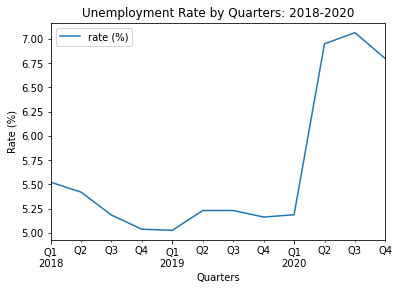

In [148]:
Quarterly_resampled_data.plot(kind="line")

plt.xlabel("Quarters")
plt.ylabel("Rate (%)")
plt.title("Unemployment Rate by Quarters: 2018-2020")
plt.savefig("output_data/Unemployment Rate.png")
plt.show()

# Inflation Rate in Australia from 2018 to 2020

In [114]:
# File to Load (Remember to Change These)
csv_file = os.path.join('..', 'Phillips curve', 'CPIquarterly.csv')

CPI_df = pd.read_csv(csv_file) 
CPI_df.dtypes

Quarter                              object
Change from previous quarter (%)    float64
dtype: object

In [115]:
CPI_df['Quarter']= pd.to_datetime(CPI_df['Quarter'])
CPI_df

,Quarter,Change from previous quarter (%)
0,2018-03-31,0.4
1,2018-06-30,0.4
2,2018-09-30,0.4
3,2018-12-31,0.5
4,2019-03-31,0.0
5,2019-06-30,0.6
6,2019-09-30,0.5
7,2019-12-31,0.7
8,2020-03-31,0.3
9,2020-06-30,-1.9


In [116]:
CPI_df = CPI_df.rename(columns={"Change from previous quarter (%)": "CPI %"})
CPI_df = CPI_df.set_index("Quarter")
CPI_df

,CPI %
Quarter,
2018-03-31,0.4
2018-06-30,0.4
2018-09-30,0.4
2018-12-31,0.5
2019-03-31,0.0
2019-06-30,0.6
2019-09-30,0.5
2019-12-31,0.7
2020-03-31,0.3


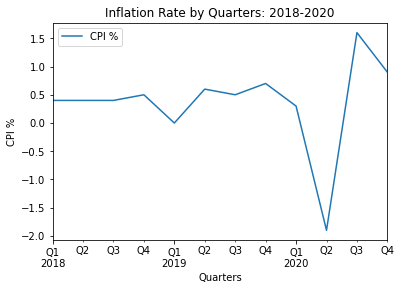

In [149]:
CPI_df.plot(kind="line")

plt.xlabel("Quarters")
plt.ylabel("CPI %")
plt.title("Inflation Rate by Quarters: 2018-2020")
plt.savefig("output_data/Inflation Rate.png")
plt.show()

# Phillips curve

In [147]:
inner_merged = pd.merge(Quarterly_resampled_data, CPI_df,left_on=['Quarter'],
              right_on=['Quarter'],
              how='inner')
inner_merged


,rate (%),CPI %
Quarter,,
2018-03-31,5.521843,0.4
2018-06-30,5.419763,0.4
2018-09-30,5.182827,0.4
2018-12-31,5.036932,0.5
2019-03-31,5.025599,0.0
2019-06-30,5.229841,0.6
2019-09-30,5.229770,0.5
2019-12-31,5.162430,0.7
2020-03-31,5.186223,0.3


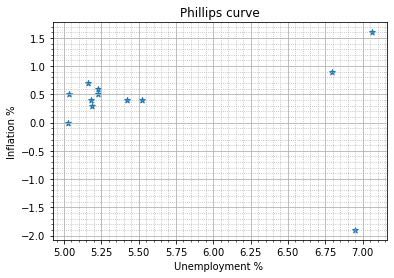

In [150]:
# Create a scatter plot based on new dataframe 
plt.scatter(inner_merged['rate (%)'], inner_merged['CPI %'], marker = "*")

# Add labels and title to plot
plt.title("Phillips curve")
plt.xlabel("Unemployment % ")
plt.ylabel("Inflation %")
plt.grid(True)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.minorticks_on()
plt.savefig("output_data/Correlation(Phillips Curve).png")
# Display plot
plt.show()

# Correlation and Regression

In [39]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.18x +1.4


The r-value is: 0.028446078793564478


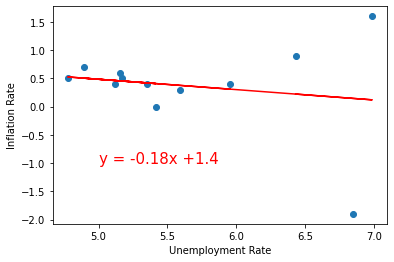

In [66]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Unemployment Rate")
plt.ylabel("Inflation Rate")

# Annotate linear regression
plt.annotate(line_eq,(5,-1),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("output_data/Correlation and Regression.png")
plt.show()


In [42]:
# We then compute the Pearson correlation coefficient between "Unemployment %" and "Inflation %"
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Unemployment % and Inflation % is {round(correlation[0],2)}")

The correlation between Unemployment % and Inflation % is -0.17
